# A Statistical Analysis on the 2020 Kaggle ML & DS Survey

## Background
- Kaggle has hosted an open data scientist competition in 2020 titled “Kaggle ML & DS Survey Challenge.” The purpose of this challenge was to “tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration.” More information on the competition, data, and prizes can be found on: https://www.kaggle.com/c/kaggle-survey-2020/data

### Question 1 - Summarize dataset characteristics

- Present 3 figures that represent differnt trends in the data. 
- You can consider Country, Age, Education, Professional Experience, and Salary


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# Extract the selected columns from the given Excel File
# Rename the columns
col_list =['Q1','Q2','Q3','Q4','Q6', 'Q24']
col_name = ['age','sex','country','education','years_of_experience','salary']
clean_data = pd.read_csv('clean_kaggle_data.csv', usecols=col_list)

col={}

for i in range(len(col_list)):
    col[col_list[i]]=col_name[i]
    
clean_data = clean_data.rename(columns=col)

In [146]:
clean_data.describe()

,salary
count,10729.000000
mean,48777.239258
std,69458.784233
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,70000.000000
max,500000.000000


In [180]:
clean_data.head()

,age,sex,country,education,years_of_experience,salary
0,30-34,Man,United States of America,Master’s degree,5-10 years,125000
1,35-39,Man,Argentina,Bachelor’s degree,10-20 years,20000
2,30-34,Man,United States of America,Master’s degree,5-10 years,150000
3,35-39,Man,Germany,Doctoral degree,5-10 years,80000
4,35-39,Man,United States of America,Doctoral degree,1-2 years,40000


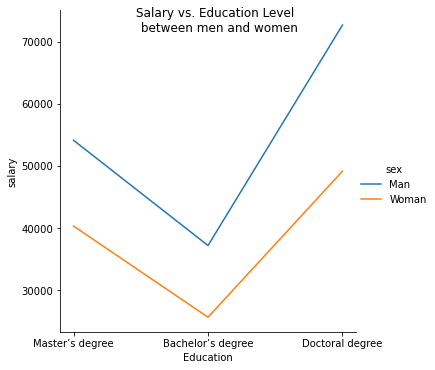

In [148]:
# Figure 1: Plot Salary vs. Education levels between Man and Woman
clean_data1 = clean_data[((clean_data.sex=='Man') | (clean_data.sex=='Woman'))&
                          ((clean_data.education == 'Bachelor’s degree')|(clean_data.education == 'Master’s degree')
                          |(clean_data.education == 'Doctoral degree'))]

ax1=sns.relplot(x='education',y='salary',data=clean_data1, 
           kind='line',hue='sex',ci=None)

ax1.fig.suptitle("Salary vs. Education Level \n between men and women")
ax1.set_axis_labels(y_var='salary', x_var='Education')

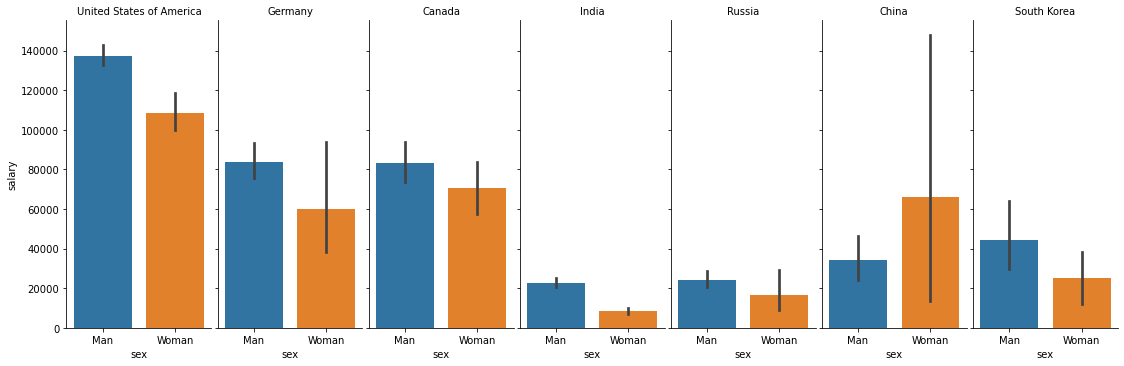

In [149]:
# Clan_data2 only contains the following countries for men & women salary
clean_data2= clean_data[((clean_data.sex=='Man') | (clean_data.sex=='Woman'))&
    ((clean_data.country=='Canada')|(clean_data1.country=='United States of America')
                        |(clean_data.country=='China')|(clean_data.country=='Germany')|(clean_data.country=='India')
                        |(clean_data.country=='Russia')|(clean_data.country=='South Korea'))]

ax2=sns.catplot(x='sex', y='salary', data=clean_data2, kind='bar',
            col='country')
ax2.fig.set_size_inches(15,5)
ax2.set_titles('{col_name}')
ax2.set_axis_labels(y_var='salary', x_var='sex')

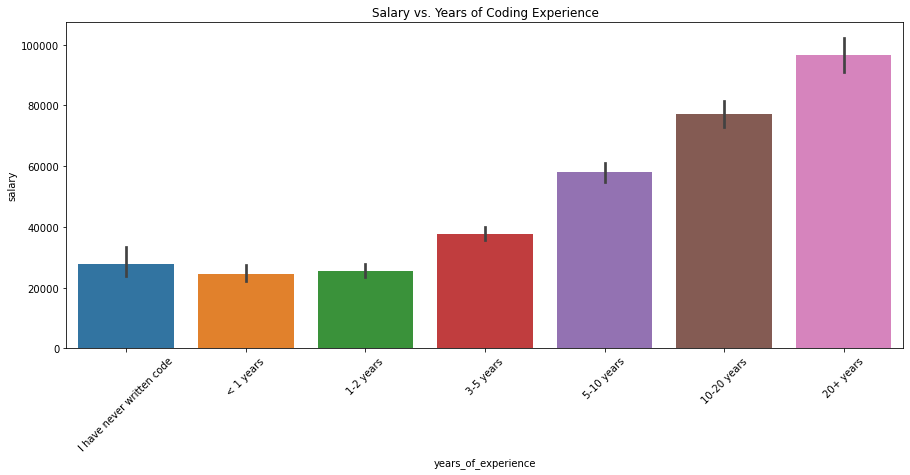

In [150]:
# Invetiagte if more coding experience leads to higher salary

clean_data.years_of_experience = (pd.Categorical(clean_data.years_of_experience,ordered =True,
                   categories =['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']))

plt.figure(figsize=(15, 6))
ax3=sns.barplot(x='years_of_experience',y='salary',data=clean_data) 

ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)
ax3.title.set_text("Salary vs. Years of Coding Experience")

### Q2 - Estimate the difference between average salary of men vs women

In [151]:
from scipy import stats

In [152]:
clean_data3 = clean_data[((clean_data.sex=='Man') | (clean_data.sex=='Woman'))]
data_man = clean_data3[clean_data3['sex']=='Man']
data_woman = clean_data3[clean_data3['sex']=='Woman']

## a. Descriptive Statistics

In [153]:
# For men's salary
data_man.describe()  # displays count, mean, std, min, max and 25%,50%,75% quantile

,salary
count,8872.000000
mean,50750.619928
std,70347.974812
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [154]:
# Median of man's salary
data_man.salary.median()

25000.0

In [155]:
# For woman's salary
data_woman.describe()

,salary
count,1683.000000
mean,36417.112299
std,59442.716093
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,500000.000000


In [156]:
#Median of woman's salary
data_woman.salary.median()

7500.0

## b.If suitable, perform T-test

(0.0, 300000.0)

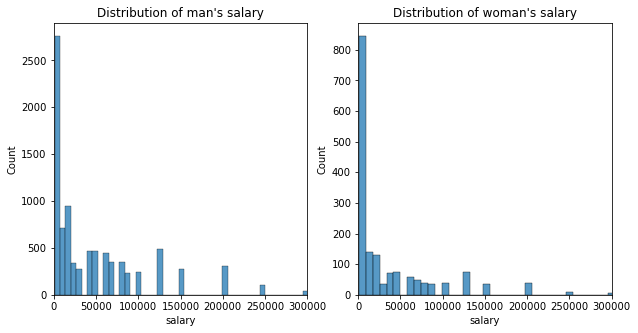

In [157]:
#Plot the distribution between two groups --- men's salary and women' salary
fig, ax4 = plt.subplots(1,2, figsize=(10,5))
sns.histplot(ax=ax4[0], x=data_man.salary)
sns.histplot(ax=ax4[1], x=data_woman.salary)
ax4[0].title.set_text("Distribution of man's salary")
ax4[1].title.set_text("Distribution of woman's salary")

ax4[0].set_xlim([0,300000])
ax4[1].set_xlim([0,300000])



In [158]:
# Use Levene's Test to check equal variance
from scipy.stats import levene
stat, p = levene(data_man.salary,data_woman.salary)
p

7.716969555891583e-11

In [159]:
# Welche's t-test with unequal variance
tc, pc = stats.ttest_ind(data_man.salary, data_woman.salary,equal_var=False)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 8.79292  p = 2.5656e-18


## c. Bootstrapping

In [160]:
# Define a function that resamples a sample. 
# Replciations is the number of resampling, which is 1000 in the assignment.

def boot_strap(data,replications):
    bt_mean_list=[]
    for i in range(replications):
        bt_sample=np.random.choice(data,size=len(data), replace=True)
        bt_mean_list.append(bt_sample.mean())
        
# Return a list to store all the bootstrapped sample means
    return bt_mean_list

In [161]:
# Bootstrap both men's and women's mean salary

bt_mean_man=np.array(boot_strap(data_man.salary,1000))
bt_mean_woman=np.array(boot_strap(data_woman.salary,1000))
mean_diff= bt_mean_man-bt_mean_woman

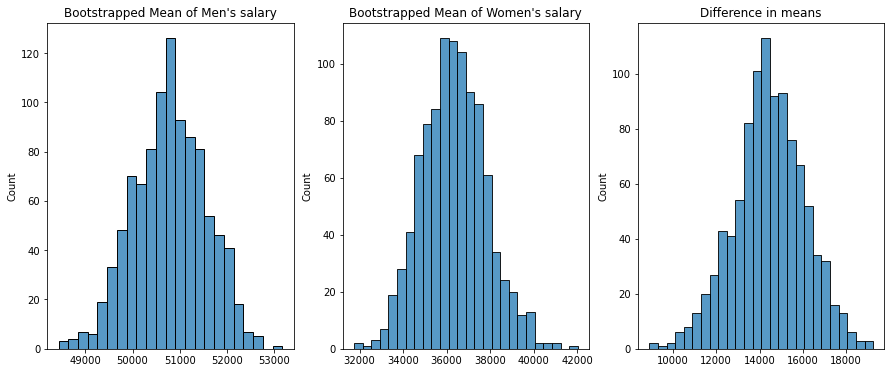

In [162]:
# plot the bootstrapping distribtuion of sample means
fig, ax5 = plt.subplots(1,3, figsize=(15,6))
sns.histplot(ax=ax5[0], x=bt_mean_man)
sns.histplot(ax=ax5[1], x=bt_mean_woman)
sns.histplot(ax=ax5[2], x=mean_diff)


ax5[0].title.set_text("Bootstrapped Mean of Men's salary")
ax5[1].title.set_text("Bootstrapped Mean of Women's salary")
ax5[2].title.set_text('Difference in means')

## d. T-test on bootstrapped data

In [163]:
#Levene test for equal varaince
stat, p = levene(bt_mean_man,bt_mean_woman)
p

1.0675175007605293e-63

In [164]:
# Welch's t-test with unequal variance

tc, pc = stats.ttest_ind(bt_mean_man, bt_mean_woman,equal_var=False)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 275.836  p = 0


### Q3. ANOVA on Bachelor's degree, Doctoral degree and Master's degree 

## a. Decriptive statistics

In [165]:
# Basic statistics for Bachelor's degree
data_bachelor=clean_data[clean_data.education=="Bachelor’s degree"]
data_bachelor.describe()

,salary
count,3013.000000
mean,35732.824427
std,60247.753546
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


In [166]:
data_bachelor.salary.median()

10000.0

In [167]:
# Basic statistics for Master's degree
data_master=clean_data[clean_data.education=="Master’s degree"]
data_master.describe()

,salary
count,4879.000000
mean,52120.106579
std,67681.571528
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [168]:
data_master.salary.median()

25000.0

In [169]:
# Basic statistics for Doctoral degree
data_phd=clean_data[clean_data.education=="Doctoral degree"]
data_phd.describe()

,salary
count,1718.000000
mean,68719.441211
std,85403.650394
min,1000.000000
25%,5000.000000
50%,40000.000000
75%,90000.000000
max,500000.000000


In [170]:
data_phd.salary.median()

40000.0

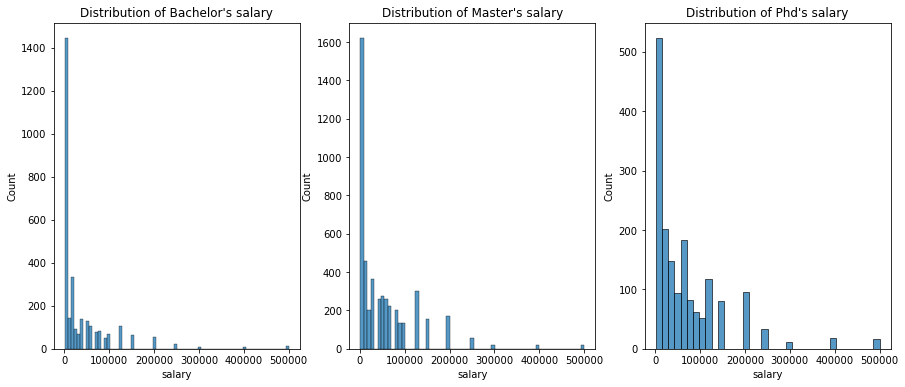

In [171]:
# Plot the distribution of three groups
fig, ax8 = plt.subplots(1,3, figsize=(15,6))
sns.histplot(ax=ax8[0], x=data_bachelor.salary)
sns.histplot(ax=ax8[1], x=data_master.salary)
sns.histplot(ax=ax8[2], x=data_phd.salary)
ax8[0].title.set_text("Distribution of Bachelor's salary")
ax8[1].title.set_text("Distribution of Master's salary")
ax8[2].title.set_text("Distribution of Phd's salary")


## b.If suitable, perform ANOVA

In [172]:
#Levene's test for equal variance
stat, p = levene(data_bachelor.salary,data_master.salary,data_phd.salary)
p

8.10689890776844e-40

In [173]:
# Kruskal-Wallis H-test - Non-parametric ANOVA
stats.kruskal(data_bachelor.salary,data_master.salary,data_phd.salary)

KruskalResult(statistic=354.12495178884615, pvalue=1.2669041737995248e-77)

## c. Bootstrapping

In [174]:
# Use the previous function to bootstrap the means of the three groups 
bt_mean_bachelor=np.array(boot_strap(data_bachelor.salary,1000))
bt_mean_master=np.array(boot_strap(data_master.salary,1000))
bt_mean_phd=np.array(boot_strap(data_phd.salary,1000))

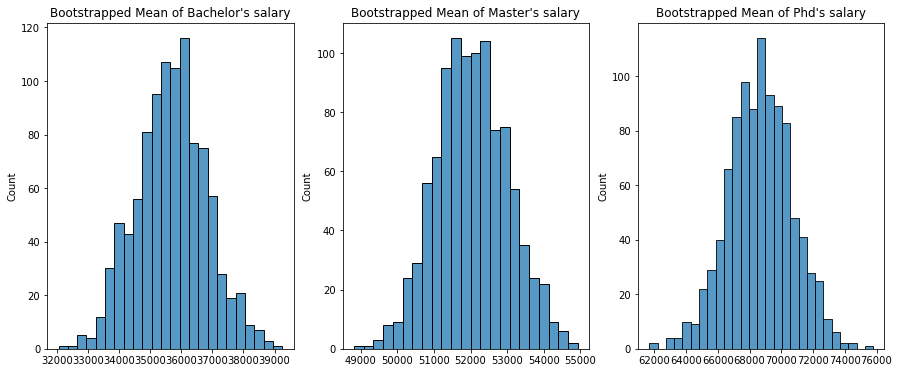

In [175]:
# Plot the bootstrapping distribution of means from three groups
fig, ax9 = plt.subplots(1,3, figsize=(15,6))
sns.histplot(ax=ax9[0], x=bt_mean_bachelor)
sns.histplot(ax=ax9[1], x=bt_mean_master)
sns.histplot(ax=ax9[2], x=bt_mean_phd)


#ax9=sns.histplot(bt_mean_bachelor)
ax9[0].title.set_text("Bootstrapped Mean of Bachelor's salary")
ax9[1].title.set_text("Bootstrapped Mean of Master's salary")
ax9[2].title.set_text("Bootstrapped Mean of Phd's salary")

In [176]:
# Difference in means --> Compare two groups each time
diff_b_m = bt_mean_master-bt_mean_bachelor
diff_b_p = bt_mean_phd-bt_mean_bachelor
diff_m_p = bt_mean_phd-bt_mean_master

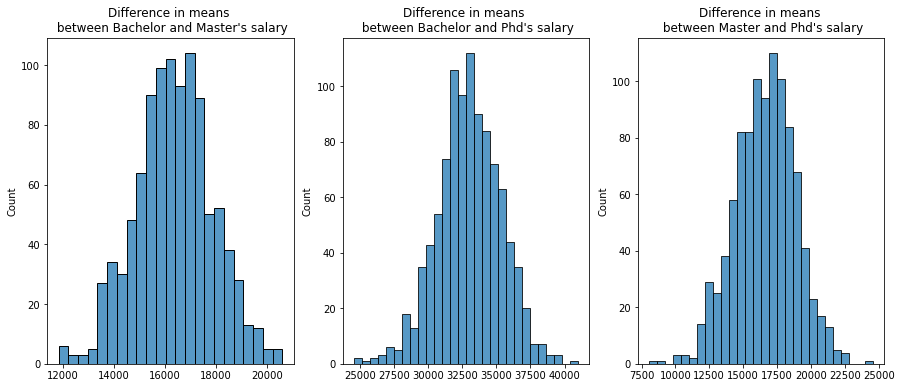

In [177]:
# Plot the distribution of differences in means among three groups
fig, ax10 = plt.subplots(1,3, figsize=(15,6))
sns.histplot(ax=ax10[0], x=diff_b_m)
sns.histplot(ax=ax10[1], x=diff_b_p)
sns.histplot(ax=ax10[2], x=diff_m_p)

ax10[0].title.set_text("Difference in means \n between Bachelor and Master's salary")

ax10[1].title.set_text("Difference in means \n between Bachelor and Phd's salary")

ax10[2].title.set_text("Difference in means \n between Master and Phd's salary")

## d. Anova on bootstrapped data

In [178]:
# Check if the variances of three groups are somewhat close to one another
print("Bachelor's Degree Group has a standard deviation of", bt_mean_bachelor.std())
print("Master's Degree Group has a standard deviation of", bt_mean_master.std())
print("Doctoral Degree Group has a standard deviation of", bt_mean_phd.std())

Bachelor's Degree Group has a standard deviation of 1124.3336916076696
Master's Degree Group has a standard deviation of 983.4377679964595
Doctoral Degree Group has a standard deviation of 2027.518923644221


In [179]:
# Assume the homogeneity of variance is acheived and the distributions are visually normal, we can conduct one-way ANOVA
stats.f_oneway(bt_mean_bachelor,bt_mean_master,bt_mean_phd)

F_onewayResult(statistic=128514.79966092526, pvalue=0.0)